# Introducción

<font color=green>
Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.
    
Necesitamos predecir si un cliente dejará el banco pronto. Tú tienes los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.    
    
    
</font>

# Objetivo

<font color=green>
    
- Crear un modelo con el máximo valor F1 posible. Para aprobar la revisión, necesitamos un valor F1 de al menos 0.59. Verificar F1 para el conjunto de prueba.

- Medir la métrica AUC-ROC y compararla con el valor F1.
</font>

# Librerías y Datos 

## Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error



## Datos

In [2]:
try:
    data = pd.read_csv('Churn.csv')
except:
    data = pd.read_csv('/datasets/Churn.csv')

### Exploración de Datos

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


<font color=green>
Observamos un total de 14 columnas, con 10000 datos. Menos la columna Tenure, que tiene datos faltantes. Estos datos iremos analizando y completando.
    
    
</font>

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [6]:
print(data.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


### Descripción y observación de datos 

<font color=green>
Revisando la información de nuestro DataFrame, observamos lo siguiente:
    
- Tenemos un total de 14 columnas.

    - `RowNumber`: índice de cadena de datos
    - `CustomerId`: identificador de cliente único
    - `Surname`: apellido
    - `CreditScore`: valor de crédito
    - `Geography`: país de residencia
    - `Gender`: sexo
    - `Age`: edad
    - `Tenure`: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
    - `Balance`: saldo de la cuenta
    - `NumOfProducts`: número de productos bancarios utilizados por el cliente
    - `HasCrCard`: el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
    - `IsActiveMember`: actividad del cliente (1 - sí; 0 - no)
    - `EstimatedSalary`: salario estimado
    
    

- La columna `Tenure` tiene datos faltantes, se corregirá.
- No tiene datos de formato equivocado.
- 3 columnas son de formato object y las restantes 11 columnas son numéricas.


</font>

In [7]:
#Transformamos los nombres de las columnas a todas por igual, o sea, a minúscula
data.columns = data.columns.str.lower()
#Verificamos si se cambió
data.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<font color=green>
    Transformamos los nombres de las columnas en minúscula.    
</font>

<font color=green>
Como anteriormente detallado, tenemos 3 columnas con formato object:
    
- `surname`
- `geography`
- `gender`
    
Los cuales analizaremos   
</font>

In [8]:
print('Cantidad de surname diferentes:', data['surname'].nunique())
print('Cantidad de geography diferentes:', data['geography'].nunique())
print('Cantidad de gender diferentes:', data['gender'].nunique())

Cantidad de surname diferentes: 2932
Cantidad de geography diferentes: 3
Cantidad de gender diferentes: 2


<font color=green>
Vemos que tenemos una gran cantidad de diferentes apellidos. Pero como contamos con la columna `customerid`, no es necesaria la columna `surname` para identificar a los clientes. Por lo tanto, podemos proceder a eliminarla.   
</font>

In [9]:
#Elimina la columna `surname`
data = data.drop('surname', axis=1)

<font color=green>
Para las otras dos columnas tienen poca cantidad diferente, por lo tanto usaremos el método `get_dummies`.
</font>

In [10]:
data = pd.get_dummies(data, columns=['geography', 'gender'])
# data= pd.get_dummies(data, columns=['gender'], drop_first = True)
# data = pd.get_dummies(data, columns=['geography'])

In [11]:
#Verificamos como quedó:
data.head()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_France,geography_Germany,geography_Spain,gender_Female,gender_Male
0,1,15634602,619,42,2.0,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,502,42,8.0,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,699,39,1.0,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1,1,0


<font color=green>
Las dos columnas, `rownumber`y `customerid` no aportan información muy útil para nuestros modelos para predecir algo, por lo tanto, podríamos eliminarlos.
</font>

In [12]:
data = data.drop(['rownumber', 'customerid'], axis=1)

In [13]:
#Verificamos como quedó:
data.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_France,geography_Germany,geography_Spain,gender_Female,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1,1,0


<font color=green>
Llegamos a la columna `tenure`, la cual tenía valores vacíos y que deben ser llenados. Conozcamos la columna.
</font>

In [14]:
data['tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

In [15]:
data[data['geography_France']==1]['tenure'].describe()

count    4550.000000
mean        5.003956
std         2.891377
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

In [16]:
data[data['geography_Germany']==1]['tenure'].describe()

count    2293.000000
mean        4.981247
std         2.936961
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: tenure, dtype: float64

In [17]:
data[data['geography_Spain']==1]['tenure'].describe()

count    2248.000000
mean        5.001779
std         2.859100
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: tenure, dtype: float64

In [18]:
data[data['gender_Female']==1]['tenure'].describe()

count    4117.000000
mean        4.957493
std         2.908867
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

In [19]:
data[data['gender_Male']==1]['tenure'].describe()

count    4974.000000
mean        5.030961
std         2.882833
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: tenure, dtype: float64

<font color=green>
Analizando la columna tenure con geography y gender, observamos que la media y mediana, prácticamente tienen el mismo valor en cada caso. Esto no indica que la muestra de datos es bastante pareja. De todas formas, revisemos como se distribuyen con un diagrama de caja
</font>

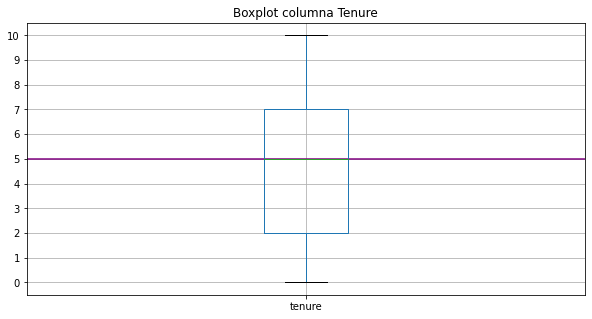

In [20]:
data.boxplot(column = 'tenure', figsize=(10,5))
plt.yticks(np.arange(0,10.1, step=1))
plt.hlines(5,xmin=0.5,xmax=1.5, color='purple')
plt.title('Boxplot columna Tenure')
plt.show()

<font color=green>
Si bien, los datos están más inclinados hacia abajo, tanto la media como mediana están en el 5. Usaremos ese valor para llenar los valores vacíos de la columna `tenure`.
</font>

In [21]:
data['tenure'] = data['tenure'].fillna(value=5)
#Verificamos si están completos los valores
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   creditscore        10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   tenure             10000 non-null  float64
 3   balance            10000 non-null  float64
 4   numofproducts      10000 non-null  int64  
 5   hascrcard          10000 non-null  int64  
 6   isactivemember     10000 non-null  int64  
 7   estimatedsalary    10000 non-null  float64
 8   exited             10000 non-null  int64  
 9   geography_France   10000 non-null  uint8  
 10  geography_Germany  10000 non-null  uint8  
 11  geography_Spain    10000 non-null  uint8  
 12  gender_Female      10000 non-null  uint8  
 13  gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(5)
memory usage: 752.1 KB


## Separación de datos

<font color=green>
Como mencionado antes, en este caso no debemos llenar datos faltantes ni corregir el formato de estos. Pero de todas formas, debemos preparar los datos antes de poder trabajar con ellos. Para poder entrenar, validar y testear el modelo, debemos efectuar 2 pasos antes:
    
 1. Dividir los datos en distintos grupos. En este caso, dejaremos el 60% para entrenar, 20% para validar y 20% para testear el modelo.

 2. Crear los targets y features, considerando el entrenamiento, validación y testeo del modelo. Considerando la columna `exited` como el objetivo(target).
</font>

In [22]:
#Separamos el grupo de testeo
data_rest, data_test = train_test_split(data, test_size=0.2, random_state=54321)
print(f'Tamaño data_rest:', data_rest.shape)
print('---------------------------')
print(f'Tamaño data_test:', data_test.shape)

Tamaño data_rest: (8000, 14)
---------------------------
Tamaño data_test: (2000, 14)


In [23]:
#Separamos el grupo de entrenamiento y validación:
data_train, data_valid = train_test_split(data_rest, test_size=0.25, random_state=54321)
print(f'Tamaño data_train:', data_train.shape)
print('----------------------------')
print(f'Tamaño data_valid:', data_valid.shape)

Tamaño data_train: (6000, 14)
----------------------------
Tamaño data_valid: (2000, 14)


In [24]:
#Creamos los features y targets para nuestro modelo
features_train = data_train.drop(['exited'], axis=1)
target_train = data_train['exited']
features_valid = data_valid.drop(['exited'], axis=1)
target_valid = data_valid['exited']
features_test = data_test.drop(['exited'], axis=1)
target_test = data_test['exited']

In [25]:
#Imprimamos los tamaños finales de nuestros DataFrames
print(f'DataFrame de Entrenamiento:')
print(features_train.shape)
print(target_train.shape)
print('--'*12)
print(f'DataFrame de Validación:')
print(features_valid.shape)
print(target_valid.shape)
print('--'*11)
print(f'DataFrame de Prueba:')
print(features_test.shape)
print(target_test.shape)

DataFrame de Entrenamiento:
(6000, 13)
(6000,)
------------------------
DataFrame de Validación:
(2000, 13)
(2000,)
----------------------
DataFrame de Prueba:
(2000, 13)
(2000,)


# Modelos a ocupar
<font color=green>
Primero analizaremos los 3 tipos de modelos, sin ajustar el peso de clases. En todos los casos, comprobaremos los valores de Recall y Precisión.    
</font>

### Modelo: Árbol de decisión
<font color=green>
Para comenzar, utilizaremos el modelo de Árbol de decisión. Es el segundo modelo más rápido de procesamiento. Pero podemos jugar, cambiando su profundidad.    
</font>

In [26]:
best_tree = 0
best_depth = 0
best_leaf = 0
score = 0
for depth in range(1, 20): # selecciona el rango del hiperparámetro
    for leaf in range(1,20):
        tree = DecisionTreeClassifier(random_state=54321, max_depth=depth, min_samples_leaf=leaf) # configura el número de árboles
        tree.fit(features_train,target_train) # entrena el modelo en el conjunto de entrenamiento
        predicted_valid = tree.predict(features_valid)
        score = f1_score(target_valid, predicted_valid) # calcula la puntuación de exactitud en el conjunto de validación
        if score > best_tree:
            best_tree = score # guarda la mejor puntuación de exactitud en el conjunto de validación
            best_depth = depth # guarda el número de estimadores que corresponden a la mejor puntuación de exactitud
            best_leaf = leaf

print("Exactitud del mejor modelo en el conjunto de validación (depth = {}, leafs = {}): {}".format(best_depth, best_leaf, best_tree))

final_tree = DecisionTreeClassifier(random_state=54321, max_depth=best_depth, min_samples_leaf=best_leaf) # cambia n_estimators para obtener el mejor modelo
final_tree.fit(features_train, target_train)



Exactitud del mejor modelo en el conjunto de validación (depth = 11, leafs = 17): 0.6133004926108374


DecisionTreeClassifier(max_depth=11, min_samples_leaf=17, random_state=54321)

In [27]:
predicted_valid = final_tree.predict(features_valid)

precision_tree = precision_score(target_valid, predicted_valid)
recall_tree = recall_score(target_valid, predicted_valid)

print('Recall:', recall_tree)
print('Precisión:', precision_tree)




Recall: 0.5633484162895928
Precisión: 0.672972972972973


In [28]:
print(f1_score(target_valid, predicted_valid))
#print((2*precision_tree*recall_tree)/(precision_tree+recall_tree))

0.6133004926108374


<font color=green>
Observamos que el valor de Recall se encuentra más cerca del 1 que del 0, indicando que el modelo es bueno para identificar verdaderos positivos.
La Precisión se encuentra más cerca del 1 que del 0 también.
Llegamos a cumplir el valor F1 mínimo requerido.   
</font>

### Bosque aleatorio

In [29]:
best_forest = 0
best_est = 0
score=0
best_depth = 0
for est in range(1, 10): # selecciona el rango del hiperparámetro
    for depth in range(1, 10): # selecciona el rango del hiperparámetro
        forest = RandomForestClassifier(random_state=54321, n_estimators=est, max_depth=depth) # configura el número de árboles
        forest.fit(features_train,target_train) # entrena el modelo en el conjunto de entrenamiento
        predicted_valid = forest.predict(features_valid)
        score = f1_score(target_valid, predicted_valid) # calcula la puntuación de exactitud en el conjunto de validación
        if score > best_forest:
            best_forest = score# guarda la mejor puntuación de exactitud en el conjunto de validación
            best_est = est # guarda el número de estimadores que corresponden a la mejor puntuación de exactitud
            best_depth = depth

print("Exactitud del mejor modelo en el conjunto de validación (n_estimators = {}, depth = {}): {}".format(best_est, best_depth, best_forest))

final_forest = RandomForestClassifier(random_state=54321, n_estimators=best_est, max_depth=best_depth) # cambia n_estimators para obtener el mejor modelo
final_forest.fit(features_train, target_train)



Exactitud del mejor modelo en el conjunto de validación (n_estimators = 4, depth = 9): 0.5710306406685236


RandomForestClassifier(max_depth=9, n_estimators=4, random_state=54321)

In [30]:
predict_valid = final_forest.predict(features_valid)

precision_forest = precision_score(target_valid, predict_valid) # <escribe el código aquí  >
recall_forest = recall_score(target_valid, predict_valid) # < escribe el código aquí  >

print('Recall:', recall_forest)
print('Precisión:', precision_forest)

Recall: 0.4638009049773756
Precisión: 0.7427536231884058


In [31]:
print(f1_score(target_valid, predict_valid))

0.5710306406685236


<font color=green>
En el caso del bosque, observamos también que Recall es menor que Precisión. A su vez, Recall quedó más bajo y esá un poco más cerca del 0 que en el árbol.
La precisión en cambio, aumentó levemente.
Pero no pudimos cumplir con el valor mínimo de F1 de 0.59.  
</font>

### Regresión logística

In [32]:
regl = LogisticRegression(random_state=54321, solver='liblinear') # inicializa el constructor de regresión logística con los parámetros random_state=54321 y solver='liblinear'
regl.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento
score_train = regl.score(features_train, target_train) # calcula la puntuación de accuracy en el conjunto de entrenamiento
score_valid = regl.score(features_valid, target_valid) # calcula la puntuación de accuracy en el conjunto de validación

print("Accuracy del modelo de regresión logística en el conjunto de entrenamiento:", score_train)
print("Accuracy del modelo de regresión logística en el conjunto de validación:", score_valid)

Accuracy del modelo de regresión logística en el conjunto de entrenamiento: 0.7956666666666666
Accuracy del modelo de regresión logística en el conjunto de validación: 0.7815


In [33]:
reg = LogisticRegression(solver='liblinear', random_state=54321) # Creamos el modelo
reg.fit(features_train, target_train) # Lo entrenamos

pred_valid = reg.predict(features_valid) # Realizamos predicciones desde los datos de validación
print('F1:', f1_score(target_valid, pred_valid)) # Vemos el valor de F1 de la regresión
print('Score:', reg.score(features_valid,target_valid))
print()

precision_log = precision_score(target_valid, pred_valid) 
recall_log = recall_score(target_valid, pred_valid) 

print('Recall:', recall_log)
print('Precisión:', precision_log)
f1 = 2*precision_log*recall_log/(precision_log+recall_log)
print('Puntuación F1 manual:', f1)



F1: 0.03956043956043956
Score: 0.7815

Recall: 0.020361990950226245
Precisión: 0.6923076923076923
Puntuación F1 manual: 0.03956043956043956


<font color=green>
En el caso de la Regresión logística, observamos que tenemos un valor de F1 muy por debajo.
Recall está muy por debajo y demasiado cerca de 0.
Precisión también bajó.
</font>

## Modelos balanceados

<font color=green>
Para balanceear los modelos, utilizaremos 3 medidas:
    
- Hiperparámetro: `class_weight='balanced'`
- Para bosque aleatorio, Hiperparámetro: `class_weight='balanced_subsample'`
- Cambiando el umbral de las respuestas positivas
    
En el cambio de umbral, aprovecharemos de estudiar el valor AUC-ROC en cada modelo.    
</font>

### Árbol de decisión

In [34]:
best_tree = 0
best_depth = 0
best_leaf = 0
score = 0
for depth in range(1, 20): # selecciona el rango del hiperparámetro
    for leaf in range(1,20):
        tree = DecisionTreeClassifier(random_state=54321, max_depth=depth, min_samples_leaf=leaf, class_weight='balanced') # configura el número de árboles
        tree.fit(features_train,target_train) # entrena el modelo en el conjunto de entrenamiento
        predicted_valid = tree.predict(features_valid)
        score = f1_score(target_valid, predicted_valid) # calcula la puntuación de exactitud en el conjunto de validación
        if score > best_tree:
            best_tree = score # guarda la mejor puntuación de exactitud en el conjunto de validación
            best_depth = depth # guarda el número de estimadores que corresponden a la mejor puntuación de exactitud
            best_leaf = leaf

print("Exactitud del mejor modelo en el conjunto de validación (depth = {}, leafs = {}): {}".format(best_depth, best_leaf, best_tree))

final_balanced_tree = DecisionTreeClassifier(random_state=54321, max_depth=best_depth, min_samples_leaf=best_leaf) # cambia n_estimators para obtener el mejor modelo
final_balanced_tree.fit(features_train, target_train)

Exactitud del mejor modelo en el conjunto de validación (depth = 6, leafs = 9): 0.5928571428571429


DecisionTreeClassifier(max_depth=6, min_samples_leaf=9, random_state=54321)

In [35]:
predict_valid = final_balanced_tree.predict(features_valid)

precision = precision_score(target_valid, predict_valid)
recall = recall_score(target_valid, predict_valid)

print('Recall:', recall)
print('Precisión:', precision)

Recall: 0.48642533936651583
Precisión: 0.7570422535211268


In [36]:
print(f1_score(target_valid, predict_valid))

0.5922865013774105


<font color=green>
Observamos que el valor de Recall del modelo balanceado de árbol, ha disminuido, al igual el valor F1.
</font>

In [37]:
#Cambiamos de umbral:
probabilities_valid = final_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_treshold = 0
score = 0
best_precision = 0
best_recall = 0
best_score = 0

for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    score = f1_score(target_valid, predicted_valid) # calcula la puntuación de exactitud en el conjunto de validación
    if score > best_score:
        best_score = score
        best_treshold = threshold # guarda la mejor puntuación de exactitud en el conjunto de validación
        best_precision = precision_score(target_valid, predicted_valid) # guarda el número de estimadores que corresponden a la mejor puntuación de exactitud
        best_recall = recall_score(target_valid,predicted_valid)

print('Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}, F1 = {:.4f}'.format(best_treshold,best_precision,best_recall,best_score))

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

Threshold = 0.52 | Precision = 0.689, Recall = 0.557, F1 = 0.6158
AUC-ROC: 0.8280876980001045


<font color=green>
Con el cambio del umbral, podemos observar que el valor de Recall aumenta y el valor de F1 aumentó de 0.58 a 0.60
</font>

### Bosque aleatorio

In [38]:
best_forest = 0
best_est = 0
score=0
best_depth = 0
for est in range(1, 10): # selecciona el rango del hiperparámetro
    for depth in range(1, 10): # selecciona el rango del hiperparámetro
            forest = RandomForestClassifier(random_state=54321, n_estimators=est, max_depth=depth, class_weight='balanced') # configura el número de árboles
            forest.fit(features_train,target_train) # entrena el modelo en el conjunto de entrenamiento
            predicted_valid = forest.predict(features_valid)
            score = f1_score(target_valid, predicted_valid) # calcula la puntuación de exactitud en el conjunto de validación
            if score > best_forest:
                best_forest = score# guarda la mejor puntuación de exactitud en el conjunto de validación
                best_est = est # guarda el número de estimadores que corresponden a la mejor puntuación de exactitud
                best_leaf = leaf
                best_depth = depth

print("Exactitud del mejor modelo en el conjunto de validación (n_estimators = {}, depth = {}): {}".format(best_est, best_depth, best_forest))

final_balanced_forest = RandomForestClassifier(random_state=54321, n_estimators=best_est, max_depth=best_depth, class_weight = 'balanced') # cambia n_estimators para obtener el mejor modelo
final_balanced_forest.fit(features_train, target_train)

Exactitud del mejor modelo en el conjunto de validación (n_estimators = 9, depth = 9): 0.6190476190476191


RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=9,
                       random_state=54321)

In [39]:
predict_valid = final_balanced_forest.predict(features_valid)

precision = precision_score(target_valid, predict_valid) # <escribe el código aquí  >
recall = recall_score(target_valid, predict_valid) # < escribe el código aquí  >

print('Recall:', recall)
print('Precisión:', precision)

Recall: 0.6764705882352942
Precisión: 0.5706106870229007


In [40]:
print(f1_score(target_valid, predict_valid))

0.6190476190476191


<font color=green>
Balanceando el modelo del Bosque aleatorio, podemos observar que Recall subió a 0.67 y el valor F1 aumentó de 0.56 a 0.60
</font>

In [41]:
#Bosque aleatorio con clase de peso 'balanced_subsample'
best_forest = 0
best_est = 0
score=0
best_depth = 0
for est in range(1, 10): # selecciona el rango del hiperparámetro
    for depth in range(1, 10): # selecciona el rango del hiperparámetro
        forest = RandomForestClassifier(random_state=54321, n_estimators=est, max_depth=depth, class_weight='balanced_subsample') # configura el número de árboles
        forest.fit(features_train,target_train) # entrena el modelo en el conjunto de entrenamiento
        predicted_valid = forest.predict(features_valid)
        score = f1_score(target_valid, predicted_valid) # calcula la puntuación de exactitud en el conjunto de validación
        if score > best_forest:
            best_forest = score# guarda la mejor puntuación de exactitud en el conjunto de validación
            best_est = est # guarda el número de estimadores que corresponden a la mejor puntuación de exactitud
            best_depth = depth

print("Exactitud del mejor modelo en el conjunto de validación (n_estimators = {}, depth = {}): {}".format(best_est, best_depth, best_forest))

final_balanced_sub_forest = RandomForestClassifier(random_state=54321, n_estimators=best_est, max_depth=best_depth, class_weight='balanced_subsample') # cambia n_estimators para obtener el mejor modelo
final_balanced_sub_forest.fit(features_train, target_train)



Exactitud del mejor modelo en el conjunto de validación (n_estimators = 9, depth = 6): 0.6150832517140058


RandomForestClassifier(class_weight='balanced_subsample', max_depth=6,
                       n_estimators=9, random_state=54321)

In [42]:
final_balanced_sub_forest_predict_valid = final_balanced_sub_forest.predict(features_valid)

precision_fbsf = precision_score(target_valid, final_balanced_sub_forest_predict_valid) 
recall_fbsf = recall_score(target_valid, final_balanced_sub_forest_predict_valid)

print('Recall:', recall_fbsf)
print('Precisión:', precision_fbsf)



Recall: 0.7104072398190046
Precisión: 0.542314335060449


In [43]:
print(f1_score(target_valid, final_balanced_sub_forest_predict_valid))

0.6150832517140058


<font color=green>
Al ocupar un modelo de Bosque aleatorio con parámetro "balanced_subsample", podemos observar que Recall subió a 0.67 y el valor F1 aumentó de 0.56 a 0.60
</font>

<font color=green>
Procederemos con el cambio de umbral. Para estudiar el efecto entre los modelos de Bosque aleatorio; Bosque sin balancear, Bosque balanceado y Bosque Balanceado con subsample.
</font>


In [44]:
#Bosque aleatorio sin balanceo:
probabilities_valid = final_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_treshold = 0
score = 0
best_precision = 0
best_recall = 0
best_score = 0

for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    score = f1_score(target_valid, predicted_valid) # calcula la puntuación de exactitud en el conjunto de validación
    if score > best_score:
        best_score = score
        best_treshold = threshold # guarda la mejor puntuación de exactitud en el conjunto de validación
        best_precision = precision_score(target_valid, predicted_valid) # guarda el número de estimadores que corresponden a la mejor puntuación de exactitud
        best_recall = recall_score(target_valid,predicted_valid)

print('Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}, F1 = {:.4f}'.format(best_treshold,best_precision,best_recall,best_score))

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

Threshold = 0.26 | Precision = 0.561, Recall = 0.676, F1 = 0.6133
AUC-ROC: 0.8411715332918988


<font color=green>
Observamos que nuestro Recall aumentó y nuestro F1 score también aumentó. La Precisión en cambio, disminuyó.   
</font>

In [45]:
#Bosque aleatorio balanceado:
probabilities_valid = final_balanced_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_treshold = 0
score = 0
best_precision = 0
best_recall = 0
best_score = 0

for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    score = f1_score(target_valid, predicted_valid) # calcula la puntuación de exactitud en el conjunto de validación
    if score > best_score:
        best_score = score
        best_treshold = threshold # guarda la mejor puntuación de exactitud en el conjunto de validación
        best_precision = precision_score(target_valid, predicted_valid) # guarda el número de estimadores que corresponden a la mejor puntuación de exactitud
        best_recall = recall_score(target_valid,predicted_valid)

print('Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}, F1 = {:.4f}'.format(best_treshold,best_precision,best_recall,best_score))

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

Threshold = 0.48 | Precision = 0.558, Recall = 0.701, F1 = 0.6212
AUC-ROC: 0.8398028857044941


<font color=green>
Observamos que nuestro Recall disminuyó un poco comparado con el modelo anterior. Pero nuestro F1 score aumentó levemente. La Precisión aumentó levemente.   
</font>

In [46]:
#Bosque aleatorio balanceado con subsamples
probabilities_valid = final_balanced_sub_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_treshold = 0
score = 0
best_precision = 0
best_recall = 0
best_score = 0

for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    score = f1_score(target_valid, predicted_valid) # calcula la puntuación de exactitud en el conjunto de validación
    if score > best_score:
        best_score = score
        best_treshold = threshold # guarda la mejor puntuación de exactitud en el conjunto de validación
        best_precision = precision_score(target_valid, predicted_valid) # guarda el número de estimadores que corresponden a la mejor puntuación de exactitud
        best_recall = recall_score(target_valid,predicted_valid)

print('Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}, F1 = {:.4f}'.format(best_treshold,best_precision,best_recall,best_score))

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

Threshold = 0.52 | Precision = 0.568, Recall = 0.676, F1 = 0.6178
AUC-ROC: 0.8533071172578838


<font color=green>
Observamos que nuestro Recall disminuyó levemente. La precisión aumentó levemente y el valor F1 se mantuvo casi igual. Podríamos conluir que nuestro Bosque aleatorio balanceado con un umbral del 52% tiene el valor F1 más alto.    
</font>

### Regresión Logística

In [47]:
balanced_reg = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
balanced_reg.fit(features_train, target_train)
balanced_reg_pred_valid = balanced_reg.predict(features_valid)
print('F1:', f1_score(target_valid, balanced_reg_pred_valid))
print('Score: ', balanced_reg.score(features_valid, target_valid))
print()

precision_balanced_log = precision_score(target_valid, balanced_reg_pred_valid) 
recall_balanced_log = recall_score(target_valid, balanced_reg_pred_valid) 

print('Recall:', recall_balanced_log)
print('Precisión:', precision_balanced_log)
f1 = 2*precision_balanced_log*recall_balanced_log/(precision_balanced_log+recall_balanced_log)
print('Puntuación F1 manual:', f1)

F1: 0.49261849261849266
Score:  0.6735

Recall: 0.7171945701357466
Precisión: 0.37514792899408284
Puntuación F1 manual: 0.49261849261849266


<font color=green>
Observamos que la regresión lógica nos arroja un Recall alto, pero una baja precisión y el valor F1 no estaría cumpliendo con el mínimo requerido.    
</font>

In [48]:
#Cambio de umbral para la regresión logística
probabilities_valid = reg.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_treshold = 0
score = 0
best_precision = 0
best_recall = 0
best_score = 0

for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    score = f1_score(target_valid, predicted_valid) # calcula la puntuación de exactitud en el conjunto de validación
    if score > best_score:
        best_score = score
        best_treshold = threshold # guarda la mejor puntuación de exactitud en el conjunto de validación
        best_precision = precision_score(target_valid, predicted_valid) # guarda el número de estimadores que corresponden a la mejor puntuación de exactitud
        best_recall = recall_score(target_valid,predicted_valid)

print('Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}, F1 = {:.4f}'.format(best_treshold,best_precision,best_recall,best_score))

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

Threshold = 0.22 | Precision = 0.329, Recall = 0.600, F1 = 0.4250
AUC-ROC: 0.669034148664897


<font color=green>
En el cambio de umbral de la regresión Logística, observamos que si bien, tenemos un alto valor Recall, nuestro valor F1 es bastante bajo.   
</font>

In [49]:
#Cambio de umbral para la regresión logística balanceada
probabilities_valid = balanced_reg.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_treshold = 0
score = 0
best_precision = 0
best_recall = 0
best_score = 0

for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    score = f1_score(target_valid, predicted_valid) # calcula la puntuación de exactitud en el conjunto de validación
    if score > best_score:
        best_score = score
        best_treshold = threshold # guarda la mejor puntuación de exactitud en el conjunto de validación
        best_precision = precision_score(target_valid, predicted_valid) # guarda el número de estimadores que corresponden a la mejor puntuación de exactitud
        best_recall = recall_score(target_valid,predicted_valid)

print('Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}, F1 = {:.4f}'.format(best_treshold,best_precision,best_recall,best_score))

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

Threshold = 0.54 | Precision = 0.415, Recall = 0.631, F1 = 0.5009
AUC-ROC: 0.7372632275977439


<font color=green>
Observamos que la regresión lógistica balanceada, al igual que la Regresión Logística no balanceada, nos arroja un Recall alto, pero un valor F1 bajo, si bién más alto que la no balanceada, pero comparado con los otros modelos, más bajo.    
</font>

## Testeo de los mejores modelos
<font color=green>
Al haber probado varios modelos y teniendo más información sobre estos, podemos comenzar a testearlos. Para estos tests, consideraremos 2 modelos con el mayor valor F1:

- `final_balanced_forest` con un valor F1 de 0.607   
- `fina_balanced_sub_forest`con un valor F1 de 0.617
</font>

In [50]:
#creamos los target y features basados en 'data_rest'
features_rest = data_rest.drop(['exited'], axis=1)
target_rest = data_rest['exited']

In [51]:
final_balanced_forest = RandomForestClassifier(random_state=54321, n_estimators=9, max_depth=9, class_weight='balanced') # cambia n_estimators para obtener el mejor modelo
final_balanced_forest.fit(features_rest, target_rest)

score = final_balanced_forest.score(features_test, target_test)
print('Puntaje del modelo:', score)

predicted_test = final_balanced_forest.predict(features_test)
f1 = f1_score(target_test, predicted_test)
print('F1:', f1)

probabilities_test = final_balanced_forest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC:', auc_roc)

Puntaje del modelo: 0.8285
F1: 0.6088939566704674
AUC-ROC: 0.8672041726389553


In [52]:
fina_balanced_sub_forest = RandomForestClassifier(random_state=54321, n_estimators=9, max_depth=9, class_weight='balanced') # cambia n_estimators para obtener el mejor modelo
fina_balanced_sub_forest.fit(features_rest, target_rest)

score = fina_balanced_sub_forest.score(features_test, target_test)
print('Puntaje del modelo:', score)

predicted_test = fina_balanced_sub_forest.predict(features_test)
f1 = f1_score(target_test, predicted_test)
print('F1:', f1)

probabilities_test = fina_balanced_sub_forest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC:', auc_roc)

Puntaje del modelo: 0.8285
F1: 0.6088939566704674
AUC-ROC: 0.8672041726389553


# Conclusión
<font color=green>
Observamos que el valor F1 en ambos modelos, con los data_rest, son iguales y subieron levemente a 0.627, siendo nuestros modelos finales:

- `RandomForestClassifier(random_state=54321, n_estimators=9, max_depth=9, class_weight='balanced')`

Y nuestros valores finales de las métricas son:

- Puntaje del modelo: 0.837
- F1: 0.6278538812785388
- AUC-ROC: 0.8657652492435102
</font>